# 1- Imports

## **Presented By:** 
### - Azzouzi Ousssama Abderraouf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras import losses
# from keras import metrics
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import os
import time

# 2- loading datasets

In [2]:
df = pd.read_csv('simulation_data_1000.csv')
df

,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003042,0.000000,0.000000,0.000000,0.001081,0.004123,6.541053
2,0.003875,0.003042,0.000000,0.000000,0.004371,0.008246,2.246437
3,0.004161,0.003875,0.003042,0.000000,0.008207,0.012368,1.195672
4,0.004246,0.004161,0.003875,0.003042,0.012243,0.016489,0.807004
...,...,...,...,...,...,...,...
1000995,0.002344,0.001711,0.001079,0.000448,0.075725,0.078069,1.616505
1000996,0.002976,0.002344,0.001711,0.001079,0.089028,0.092004,1.710138
1000997,0.003606,0.002976,0.002344,0.001711,0.102239,0.105846,1.802170
1000998,0.004235,0.003606,0.002976,0.002344,0.115347,0.119582,1.892487


# 3- Data Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001000 entries, 0 to 1000999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   e       1001000 non-null  float64
 1   e_1     1001000 non-null  float64
 2   e_2     1001000 non-null  float64
 3   e_3     1001000 non-null  float64
 4   theta   1001000 non-null  float64
 5   ref     1001000 non-null  float64
 6   torque  1001000 non-null  float64
dtypes: float64(7)
memory usage: 53.5 MB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
e,1001000.0,0.002758,0.024460,-0.067246,-0.011763,0.002230,0.017451,0.089035
e_1,1001000.0,0.002756,0.024449,-0.067246,-0.011740,0.002212,0.017434,0.089035
e_2,1001000.0,0.002754,0.024437,-0.067246,-0.011720,0.002193,0.017412,0.089035
e_3,1001000.0,0.002752,0.024425,-0.067246,-0.011698,0.002175,0.017390,0.089035
theta,1001000.0,0.047937,0.617453,-1.543894,-0.315264,0.040661,0.431309,1.543903
ref,1001000.0,0.050695,0.639438,-1.569760,-0.328445,0.043661,0.450121,1.569756
torque,1001000.0,0.417424,4.275082,-10.118170,-2.041263,0.340463,2.841374,147.890634


In [28]:
def create_sequences(values, sequence_length):
    X, y = [], []
    for i in range(len(values) - sequence_length):
        X.append(values[i:(i + sequence_length), :-1])  # Features
        y.append(values[i + sequence_length, -1])  # Target value
    return np.array(X), np.array(y)


# 4- Feature Selection

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_nr = scaler.fit_transform(df)

# target_column = df.columns.get_loc("torque")
df_nr = pd.DataFrame(df_nr, columns=df.columns)

In [10]:
target = df['torque']

# features to drop
# redundant_features = ['torque', 'e_1', 'e_2', 'e_3']

features = df.drop(columns='torque')

# features= scaler.fit_transform(features)

features.shape, target.shape

((1001000, 6), (1001000,))

In [11]:
# features.drop(columns=['e_1', 'e_2', 'e_3'], inplace=True)
features

,e,e_1,e_2,e_3,theta,ref
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003042,0.000000,0.000000,0.000000,0.001081,0.004123
2,0.003875,0.003042,0.000000,0.000000,0.004371,0.008246
3,0.004161,0.003875,0.003042,0.000000,0.008207,0.012368
4,0.004246,0.004161,0.003875,0.003042,0.012243,0.016489
...,...,...,...,...,...,...
1000995,0.002344,0.001711,0.001079,0.000448,0.075725,0.078069
1000996,0.002976,0.002344,0.001711,0.001079,0.089028,0.092004
1000997,0.003606,0.002976,0.002344,0.001711,0.102239,0.105846
1000998,0.004235,0.003606,0.002976,0.002344,0.115347,0.119582


In [5]:
target 

0          0.000000
1          6.541053
2          2.246437
3          1.195672
4          0.807004
             ...   
1000995    1.616505
1000996    1.710138
1000997    1.802170
1000998    1.892487
1000999    1.980981
Name: torque, Length: 1001000, dtype: float64

In [92]:
x,y=create_sequences(df_nr.to_numpy(), 30)

print('x[0]:\n', x[0].shape,'\n', x[0])
print('y[0]:', y[0])
print('x[1]:\n', x[1].shape,'\n', x[1])
print('y[1]:', y[1])

x[0]:
 (30, 6) 
 [[0.43028813 0.43028813 0.43028813 0.43028813 0.49999854 0.50000075]
 [0.44975531 0.43028813 0.43028813 0.43028813 0.50034851 0.501314  ]
 [0.45508288 0.44975531 0.43028813 0.43028813 0.50141402 0.50262715]
 [0.45691152 0.45508288 0.44975531 0.43028813 0.50265644 0.50394013]
 [0.45745584 0.45691152 0.45508288 0.44975531 0.50396358 0.50525284]
 [0.4576307  0.45745584 0.45691152 0.45508288 0.50528906 0.50656518]
 [0.45775414 0.4576307  0.45745584 0.45691152 0.50661667 0.50787707]
 [0.45793589 0.45775414 0.4576307  0.45745584 0.50794079 0.50918842]
 [0.45820961 0.45793589 0.45775414 0.4576307  0.50925961 0.51049914]
 [0.45858183 0.45820961 0.45793589 0.45775414 0.5105727  0.51180913]
 [0.45904961 0.45858183 0.45820961 0.45793589 0.51188014 0.51311832]
 [0.45960698 0.45904961 0.45858183 0.45820961 0.51318212 0.51442659]
 [0.46024726 0.45960698 0.45904961 0.45858183 0.51447889 0.51573388]
 [0.46096388 0.46024726 0.45960698 0.45904961 0.5157707  0.51704008]
 [0.46175059 0.46

# 5- Data Splitting

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((800776, 30, 6),
 (100097, 30, 6),
 (100097, 30, 6),
 (800776,),
 (100097,),
 (100097,))

In [94]:
y_train = y_train.reshape(y_train.shape[0],1).astype('float32')
y_test = y_test.reshape(y_test.shape[0],1).astype('float32')
y_val = y_val.reshape(y_val.shape[0],1).astype('float32')
np.shape(y_train), np.shape(y_test), np.shape(y_val)
y_val.shape

(100097, 1)

In [95]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.config.experimental.list_physical_devices('GPU'):
    print("TensorFlow will run on GPU")
else:
    print("TensorFlow will run on CPU")


Num GPUs Available:  1
TensorFlow will run on GPU


# 6 - Model Selection

In [96]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, TimeDistributed, Flatten, LSTM, Dropout, Dense, Activation
from keras.callbacks import EarlyStopping

num_epochs = 100
batch_size = 1001
sequence_length = X_train.shape[1]
input_dim = X_train.shape[2]
output_dim = 1

model = Sequential()

# Add 1D Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, input_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Flatten the data for LSTM
model.add(TimeDistributed(Flatten()))

#model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(output_dim))
model.add(Activation("linear"))

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', restore_best_weights=True)

model.compile(loss="mse", optimizer="Adam", metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 28, 64)            1216      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 128)            49280     
                                                                 
 time_distributed (TimeDistr  (None, 4, 128)          

In [82]:
def plot_training_history(history, metric_name='mae'):
    """
    Plots the training and validation loss and a specified metric from the training history.

    Parameters:
    - history: Return value from model.fit() in Keras.
    - metric_name: The name of the metric to plot (e.g., 'mae' for Mean Absolute Error).
    """
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    epochs = range(1, len(loss) + 1)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axs[0].plot(epochs, loss, 'b-', label='Train last value: {:.4f}'.format(loss[-1]))
    axs[0].plot(epochs, val_loss, 'orange', label='Test last value: {:.4f}'.format(val_loss[-1]))
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].grid(True)
    axs[0].legend()

    # Plot Metric
    axs[1].plot(epochs, metric, 'b-', label='Train last value: {:.4f}'.format(metric[-1]))
    axs[1].plot(epochs, val_metric, 'orange', label='Test last value: {:.4f}'.format(val_metric[-1]))
    axs[1].set_title(metric_name.capitalize())
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel(metric_name.capitalize())
    axs[1].grid(True)
    axs[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Model seq = 70

In [15]:
start = time.time()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
800/800 [==============================] - 54s 30ms/step - loss: 2.6275e-04 - mae: 0.0078 - val_loss: 1.1902e-04 - val_mae: 0.0032
Epoch 2/100
800/800 [==============================] - 23s 29ms/step - loss: 1.2537e-04 - mae: 0.0031 - val_loss: 9.2010e-05 - val_mae: 0.0018
Epoch 3/100
800/800 [==============================] - 23s 29ms/step - loss: 1.0511e-04 - mae: 0.0029 - val_loss: 8.4846e-05 - val_mae: 0.0028
Epoch 4/100
800/800 [==============================] - 24s 30ms/step - loss: 9.0385e-05 - mae: 0.0026 - val_loss: 7.2624e-05 - val_mae: 0.0018
Epoch 5/100
800/800 [==============================] - 25s 31ms/step - loss: 8.1124e-05 - mae: 0.0024 - val_loss: 6.8988e-05 - val_mae: 0.0019
Epoch 6/100
800/800 [==============================] - 25s 31ms/step - loss: 7.6054e-05 - mae: 0.0023 - val_loss: 6.5353e-05 - val_mae: 0.0014
Epoch 7/100
800/800 [==============================] - 25s 31ms/step - loss: 7.0806e-05 - mae: 0.0021 - val_loss: 6.3184e-05 - val_mae: 0.0018

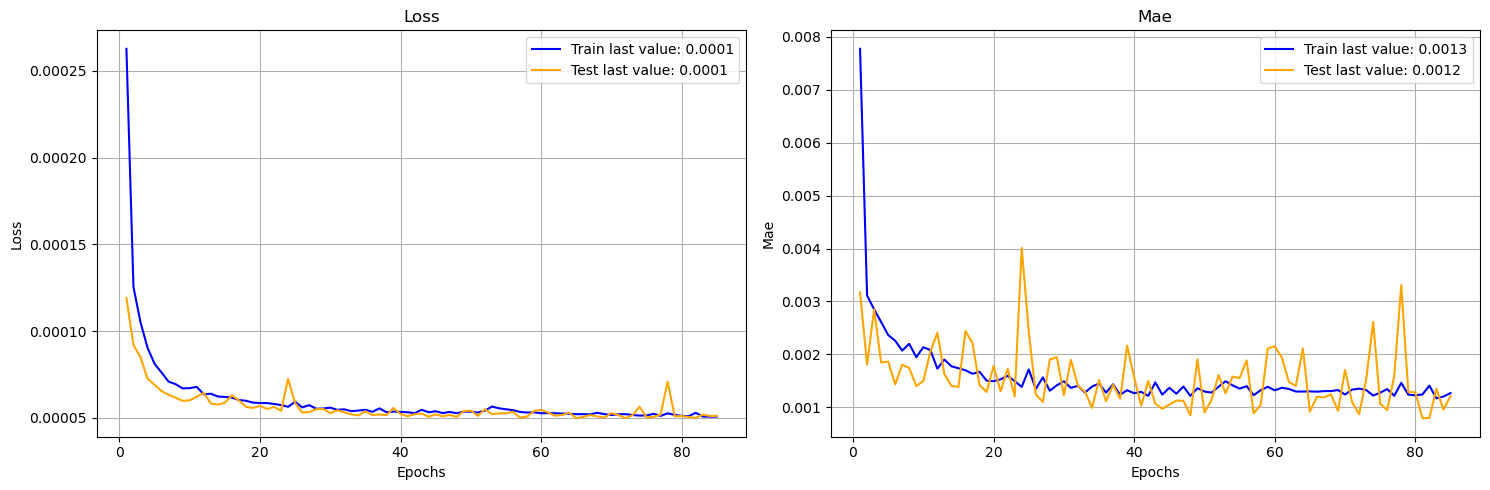

In [26]:
plot_training_history(history)

# Model seq = 40

In [32]:
start = time.time()
history2 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
800/800 [==============================] - 22s 21ms/step - loss: 3.0428e-04 - mae: 0.0092 - val_loss: 1.3833e-04 - val_mae: 0.0042
Epoch 2/100
800/800 [==============================] - 15s 19ms/step - loss: 1.5121e-04 - mae: 0.0039 - val_loss: 1.2186e-04 - val_mae: 0.0026
Epoch 3/100
800/800 [==============================] - 16s 20ms/step - loss: 1.4154e-04 - mae: 0.0031 - val_loss: 1.2046e-04 - val_mae: 0.0024
Epoch 4/100
800/800 [==============================] - 16s 20ms/step - loss: 1.3819e-04 - mae: 0.0028 - val_loss: 1.2073e-04 - val_mae: 0.0026
Epoch 5/100
800/800 [==============================] - 16s 20ms/step - loss: 1.3857e-04 - mae: 0.0029 - val_loss: 1.2263e-04 - val_mae: 0.0029
Epoch 6/100
800/800 [==============================] - 16s 20ms/step - loss: 1.3626e-04 - mae: 0.0027 - val_loss: 1.2008e-04 - val_mae: 0.0027
Epoch 7/100
800/800 [==============================] - 16s 20ms/step - loss: 1.3434e-04 - mae: 0.0024 - val_loss: 1.1524e-04 - val_mae: 0.0018

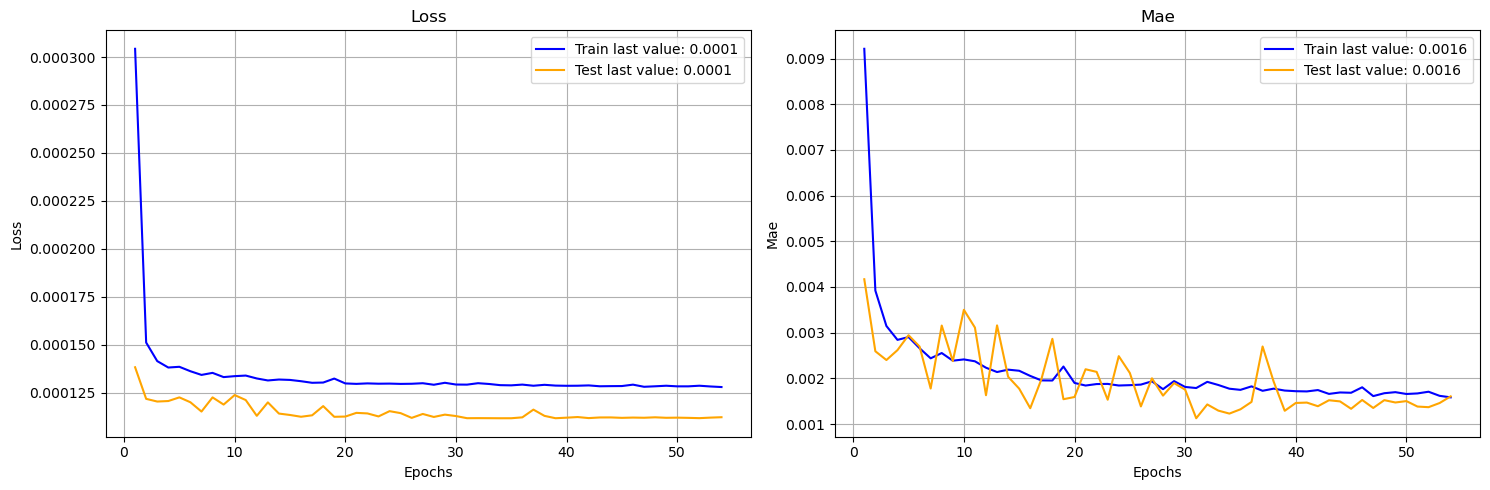

In [33]:
plot_training_history(history2)

# Model seq = 30

In [54]:
start = time.time()
history3 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
800/800 [==============================] - 15s 18ms/step - loss: 1.8131e-04 - mae: 0.0058 - val_loss: 1.1464e-04 - val_mae: 0.0033
Epoch 2/100
800/800 [==============================] - 13s 17ms/step - loss: 1.1473e-04 - mae: 0.0028 - val_loss: 8.8555e-05 - val_mae: 0.0027
Epoch 3/100
800/800 [==============================] - 13s 16ms/step - loss: 9.7498e-05 - mae: 0.0029 - val_loss: 7.8725e-05 - val_mae: 0.0032
Epoch 4/100
800/800 [==============================] - 13s 16ms/step - loss: 8.2764e-05 - mae: 0.0024 - val_loss: 6.7065e-05 - val_mae: 0.0017
Epoch 5/100
800/800 [==============================] - 13s 16ms/step - loss: 7.8322e-05 - mae: 0.0023 - val_loss: 6.6638e-05 - val_mae: 0.0020
Epoch 6/100
800/800 [==============================] - 13s 16ms/step - loss: 7.3699e-05 - mae: 0.0022 - val_loss: 6.3217e-05 - val_mae: 0.0016
Epoch 7/100
800/800 [==============================] - 13s 16ms/step - loss: 7.0334e-05 - mae: 0.0021 - val_loss: 6.3956e-05 - val_mae: 0.0015

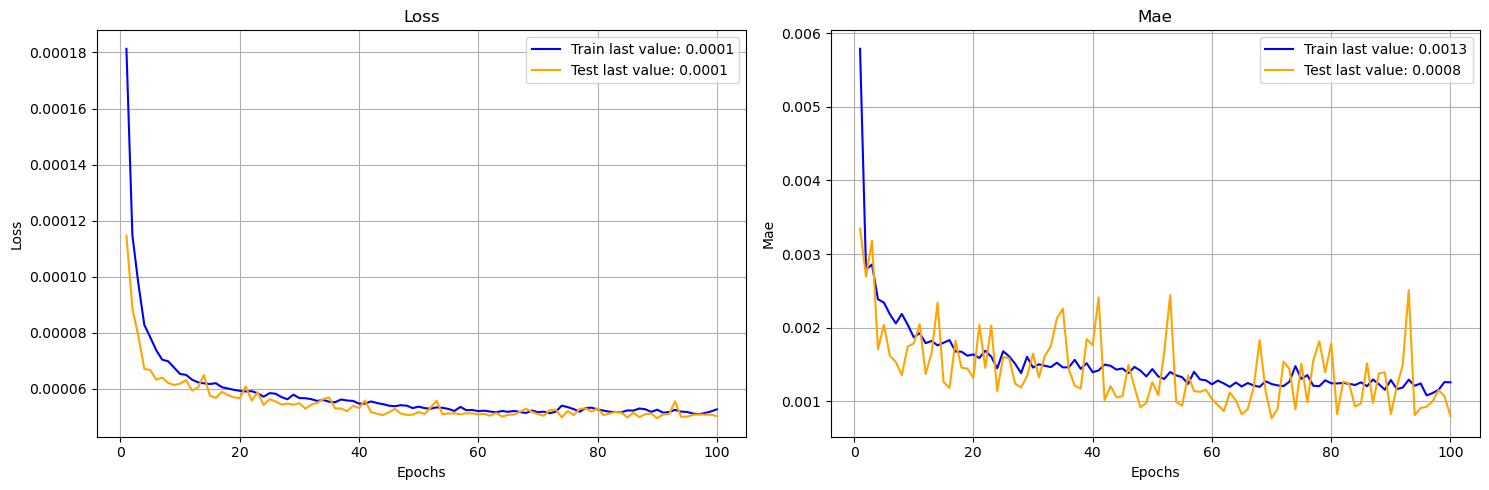

In [55]:
plot_training_history(history3)

# Model seq = 50

In [67]:
start = time.time()
history4 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
800/800 [==============================] - 33s 28ms/step - loss: 2.2873e-04 - mae: 0.0069 - val_loss: 1.0896e-04 - val_mae: 0.0021
Epoch 2/100
800/800 [==============================] - 21s 26ms/step - loss: 1.1932e-04 - mae: 0.0030 - val_loss: 8.8103e-05 - val_mae: 0.0022
Epoch 3/100
800/800 [==============================] - 21s 26ms/step - loss: 9.6218e-05 - mae: 0.0027 - val_loss: 7.4006e-05 - val_mae: 0.0022
Epoch 4/100
800/800 [==============================] - 21s 26ms/step - loss: 8.5348e-05 - mae: 0.0026 - val_loss: 6.8386e-05 - val_mae: 0.0019
Epoch 5/100
800/800 [==============================] - 21s 26ms/step - loss: 7.7788e-05 - mae: 0.0023 - val_loss: 6.4990e-05 - val_mae: 0.0014
Epoch 6/100
800/800 [==============================] - 21s 26ms/step - loss: 7.3704e-05 - mae: 0.0022 - val_loss: 6.5958e-05 - val_mae: 0.0017
Epoch 7/100
800/800 [==============================] - 21s 26ms/step - loss: 6.9661e-05 - mae: 0.0021 - val_loss: 6.2888e-05 - val_mae: 0.0018

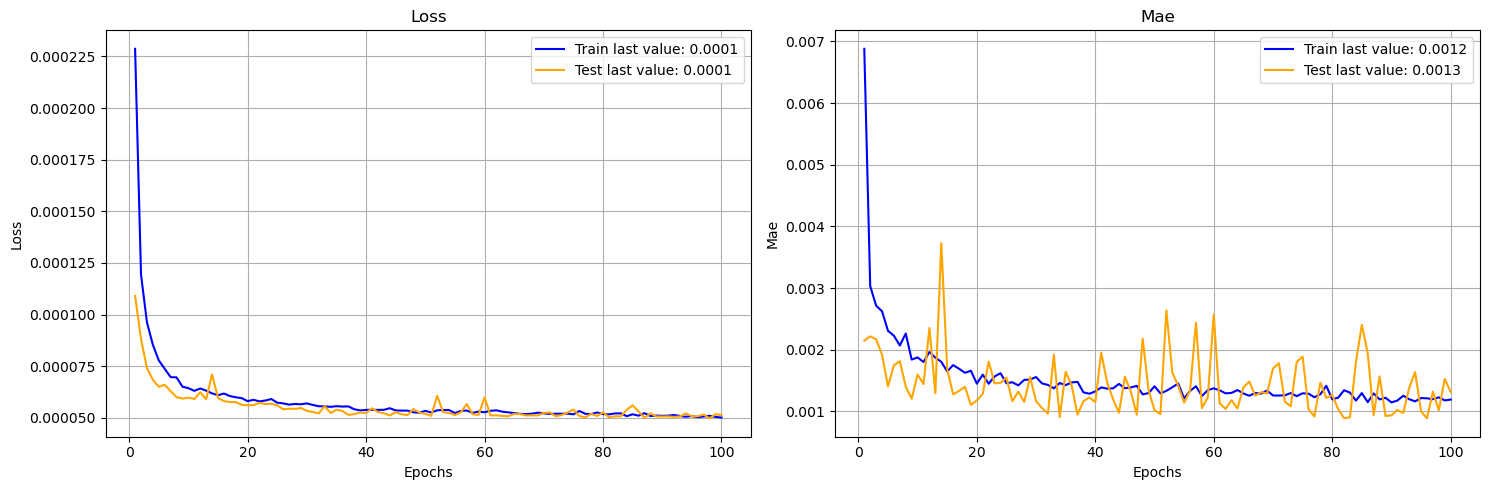

In [68]:
plot_training_history(history4)

# Model seq = 60

In [83]:
start = time.time()
history5 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
800/800 [==============================] - 49s 32ms/step - loss: 3.2610e-04 - mae: 0.0094 - val_loss: 1.3348e-04 - val_mae: 0.0033
Epoch 2/100
800/800 [==============================] - 24s 30ms/step - loss: 1.6422e-04 - mae: 0.0045 - val_loss: 1.2967e-04 - val_mae: 0.0033
Epoch 3/100
800/800 [==============================] - 23s 29ms/step - loss: 1.4496e-04 - mae: 0.0034 - val_loss: 1.1937e-04 - val_mae: 0.0022
Epoch 4/100
800/800 [==============================] - 24s 30ms/step - loss: 1.4163e-04 - mae: 0.0032 - val_loss: 1.1761e-04 - val_mae: 0.0019
Epoch 5/100
800/800 [==============================] - 25s 31ms/step - loss: 1.4021e-04 - mae: 0.0030 - val_loss: 1.1972e-04 - val_mae: 0.0024
Epoch 6/100
800/800 [==============================] - 25s 31ms/step - loss: 1.4024e-04 - mae: 0.0030 - val_loss: 1.1835e-04 - val_mae: 0.0024
Epoch 7/100
800/800 [==============================] - 25s 31ms/step - loss: 1.3739e-04 - mae: 0.0027 - val_loss: 1.2601e-04 - val_mae: 0.0035

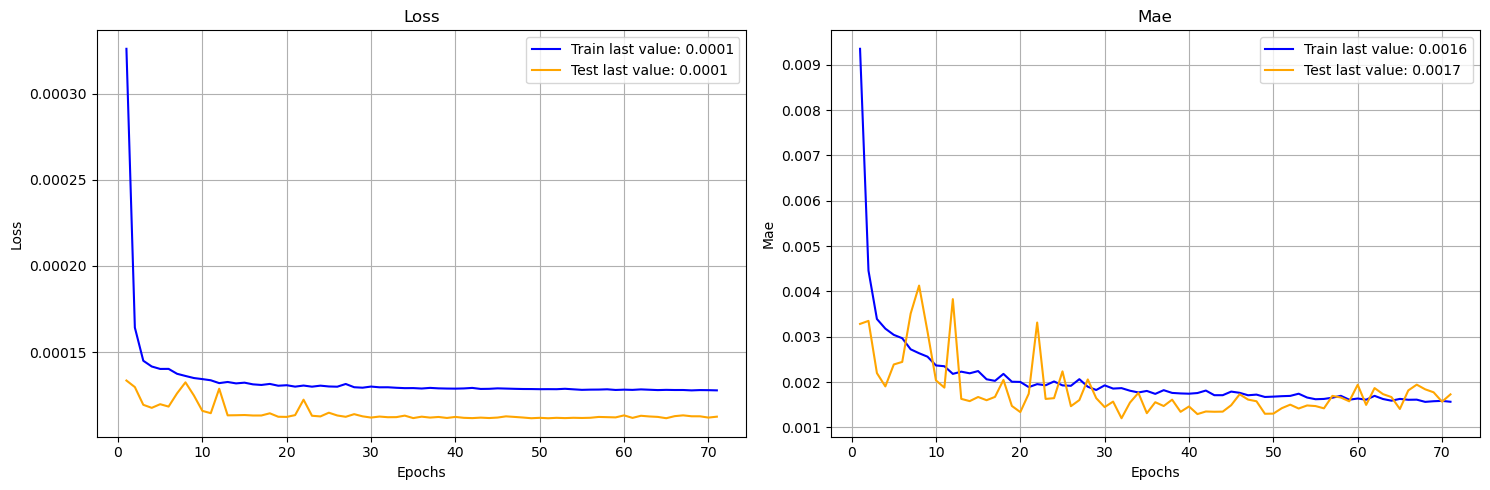

In [84]:
plot_training_history(history5)

In [85]:
from sklearn.metrics import mean_squared_error
import math

y_pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('mse:', mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))

3128/3128 [==============================] - 25s 7ms/step
Root Mean Squared Error (RMSE): 0.011510068176385101
mse: 0.00013248167
r2 score: 0.800986287632901
mean absolute error: 0.0014752828


In [86]:
model.save('lstm_cnn_model(Adam-linear-1001-60).h5')


In [37]:
# load the model
from keras.models import load_model
model = load_model('lstm_cnn_model(Adam-linear-1001-60).h5')


df2 = pd.read_csv('simulation_data.csv')

df2 = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2, columns=df.columns)
u,v = create_sequences(df2.to_numpy(), 60)
los = model.evaluate(u, v)



3127/3127 [==============================] - 31s 8ms/step - loss: 1.1682e-04 - mae: 0.0022


In [38]:
print(f"Mean Squared Error (MSE): {los}")

y_pred2 = model.predict(u)
rmse2 = np.sqrt(mean_squared_error(v, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print('mse:', mean_squared_error(v, y_pred2))
print('r2 score:', r2_score(v, y_pred2))

Mean Squared Error (MSE): [0.00011681566684274003, 0.002206773031502962]
3127/3127 [==============================] - 20s 6ms/step
Root Mean Squared Error (RMSE): 0.010808129933924004
mse: 0.00011681567266858408
r2 score: 0.8674598523454758


In [91]:
# 0.9272214515847576
# 0.9272214515847576
# 0.8003096691943187,0.8639815448384547
# 0.9269611824562033
# 0.8654728955012833

In [39]:
# loading models
model30 = load_model('lstm_cnn_model(Adam-linear-1001-30).h5')
model40 = load_model('lstm_cnn_model(Adam-linear-1001-40).h5')
model50 = load_model('lstm_cnn_model(Adam-linear-1001-50).h5')
model60 = load_model('lstm_cnn_model(Adam-linear-1001-60).h5')
model70 = load_model('lstm_cnn_model(Adam-linear-1001-70).h5')

In [73]:
# creating sequences for each model
u30,v30 = create_sequences(df2.to_numpy(), 30)
u40,v40 = create_sequences(df2.to_numpy(), 40)
u50,v50 = create_sequences(df2.to_numpy(), 50)
u60,v60 = create_sequences(df2.to_numpy(), 60)
u70,v70 = create_sequences(df2.to_numpy(), 70)


In [74]:
# testing models
y_pred30 = model30.predict(u30)
y_pred40 = model40.predict(u40)
y_pred50 = model50.predict(u50)
y_pred60 = model60.predict(u60)
y_pred70 = model70.predict(u70)


3126/3126 [==============================] - 23s 7ms/step


In [75]:
# calculating rmse for each model
rmse30 = np.sqrt(mean_squared_error(v30, y_pred30))
rmse40 = np.sqrt(mean_squared_error(v40, y_pred40))
rmse50 = np.sqrt(mean_squared_error(v50, y_pred50))
rmse60 = np.sqrt(mean_squared_error(v60, y_pred60))
rmse70 = np.sqrt(mean_squared_error(v70, y_pred70))

print(f"Root Mean Squared Error (RMSE) for 30: {rmse30}")
print(f"Root Mean Squared Error (RMSE) for 40: {rmse40}")
print(f"Root Mean Squared Error (RMSE) for 50: {rmse50}")
print(f"Root Mean Squared Error (RMSE) for 60: {rmse60}")
print(f"Root Mean Squared Error (RMSE) for 70: {rmse70}")

Root Mean Squared Error (RMSE) for 30: 0.008262446225721117
Root Mean Squared Error (RMSE) for 40: 0.01088778508434378
Root Mean Squared Error (RMSE) for 50: 0.00839202989996619
Root Mean Squared Error (RMSE) for 60: 0.010808129933924004
Root Mean Squared Error (RMSE) for 70: 0.008023713020841641


In [76]:
#calculating mse for each model
mse30 = mean_squared_error(v30, y_pred30)
mse40 = mean_squared_error(v40, y_pred40)
mse50 = mean_squared_error(v50, y_pred50)
mse60 = mean_squared_error(v60, y_pred60)
mse70 = mean_squared_error(v70, y_pred70)

print(f"Mean Squared Error (MSE) for 30: {mse30}")
print(f"Mean Squared Error (MSE) for 40: {mse40}")
print(f"Mean Squared Error (MSE) for 50: {mse50}")
print(f"Mean Squared Error (MSE) for 60: {mse60}")
print(f"Mean Squared Error (MSE) for 70: {mse70}")

Mean Squared Error (MSE) for 30: 6.826801763293312e-05
Mean Squared Error (MSE) for 40: 0.0001185438640428589
Mean Squared Error (MSE) for 50: 7.042616584192654e-05
Mean Squared Error (MSE) for 60: 0.00011681567266858408
Mean Squared Error (MSE) for 70: 6.43799706408237e-05


In [77]:
# calculating r2 score for each model
r2_30 = r2_score(v30, y_pred30)
r2_40 = r2_score(v40, y_pred40)
r2_50 = r2_score(v50, y_pred50)
r2_60 = r2_score(v60, y_pred60)
r2_70 = r2_score(v70, y_pred70)

print(f"R2 Score for 30: {r2_30}")
print(f"R2 Score for 40: {r2_40}")
print(f"R2 Score for 50: {r2_50}")
print(f"R2 Score for 60: {r2_60}")
print(f"R2 Score for 70: {r2_70}")

R2 Score for 30: 0.9225202567487644
R2 Score for 40: 0.8654728955012833
R2 Score for 50: 0.920085879853477
R2 Score for 60: 0.8674598523454758
R2 Score for 70: 0.9269611808921354


In [78]:
# calculating mean absolute error for each model
mae30 = mean_absolute_error(v30, y_pred30)
mae40 = mean_absolute_error(v40, y_pred40)
mae50 = mean_absolute_error(v50, y_pred50)
mae60 = mean_absolute_error(v60, y_pred60)
mae70 = mean_absolute_error(v70, y_pred70)

print(f"Mean Absolute Error for 30: {mae30}")
print(f"Mean Absolute Error for 40: {mae40}")
print(f"Mean Absolute Error for 50: {mae50}")
print(f"Mean Absolute Error for 60: {mae60}")
print(f"Mean Absolute Error for 70: {mae70}")


Mean Absolute Error for 30: 0.0030812637055096194
Mean Absolute Error for 40: 0.002578163883540315
Mean Absolute Error for 50: 0.0039033273905776217
Mean Absolute Error for 60: 0.002206776788496162
Mean Absolute Error for 70: 0.002601189064075589


In [87]:
names = ['lstmcnn_30', 'lstmcnn_40', 'lstmcnn_50', 'lstmcnn_60', 'lstmcnn_70']
rmses = [rmse30, rmse40, rmse50, rmse60, rmse70]
mses = [mse30, mse40, mse50, mse60, mse70]
r2s = [r2_30, r2_40, r2_50, r2_60, r2_70]
maes = [mae30, mae40, mae50, mae60, mae70]
sequence_lengths = [30, 40, 50, 60, 70]

results = pd.DataFrame({'Model': names,'sequence_length':sequence_lengths , 'RMSE': rmses, 'MSE': mses, 'R2': r2s, 'MAE': maes})
save_results = results.to_csv('results.csv', index=False)

In [88]:
results_df=results
results_df

,Model,sequence_length,RMSE,MSE,R2,MAE
0,lstmcnn_30,30,0.008262,0.000068,0.922520,0.003081
1,lstmcnn_40,40,0.010888,0.000119,0.865473,0.002578
2,lstmcnn_50,50,0.008392,0.000070,0.920086,0.003903
3,lstmcnn_60,60,0.010808,0.000117,0.867460,0.002207
4,lstmcnn_70,70,0.008024,0.000064,0.926961,0.002601


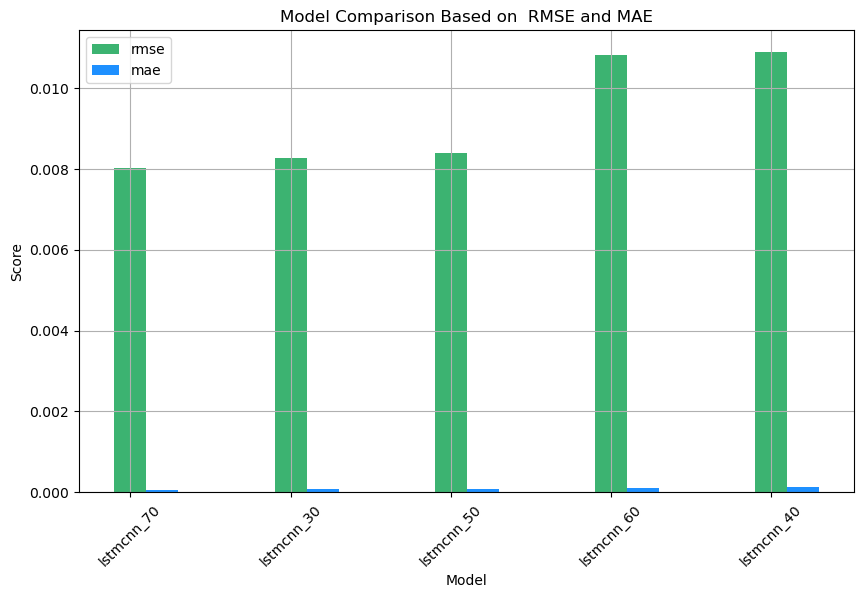

In [91]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
results_df.sort_values('RMSE', ascending=True, inplace=True)

# Defining the width of the bars
width = 0.2

# Creating an array with the positions of the bars on the x axis
r1 = np.arange(len(results_df['Model']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Ploting each bar at its respective position with new colors
# plt.bar(r1, results_df['r2'], color='tomato', width=width, label='r2_score')
plt.bar(r2, results_df['RMSE'], color='mediumseagreen', width=width, label='rmse')
plt.bar(r3, results_df['MSE'], color='dodgerblue', width=width, label='mae')
plt.grid(True)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on  RMSE and MAE')

# Adding the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(results_df['Model']))], results_df['Model'], rotation=45)

plt.legend()
plt.show()

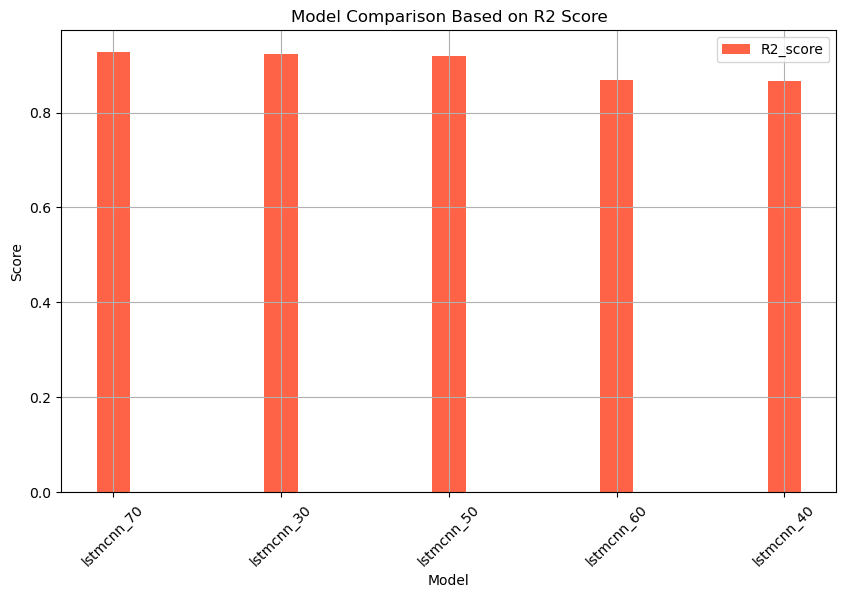

In [90]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
results_df.sort_values('R2', ascending=False, inplace=True)

# Defining the width of the bars
width = 0.2

# Creating an array with the positions of the bars on the x axis
r1 = np.arange(len(results_df['Model']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plotting each bar at its respective position with new colors
plt.bar(r2, results_df['R2'], color='tomato', width=width, label='R2_score')
plt.grid(True)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score')

# Addng the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(results_df['Model']))], results_df['Model'], rotation=45)

plt.legend()
plt.show()

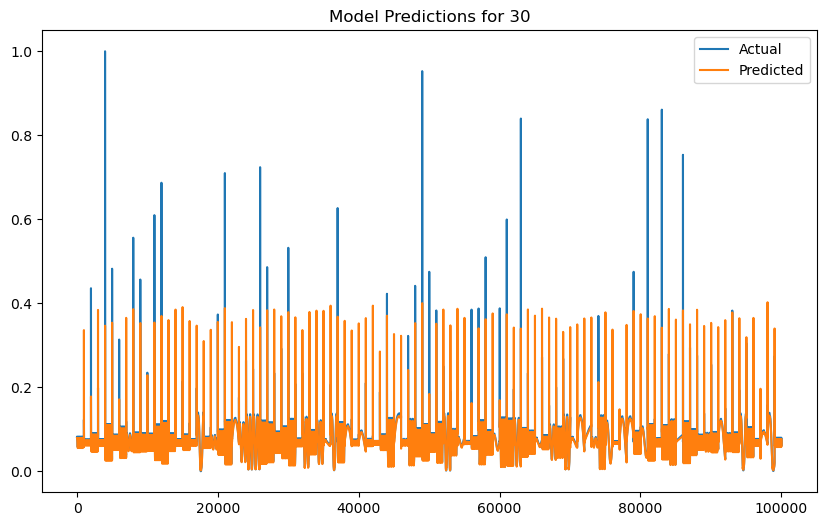

In [83]:
# a function to plot graphs of the model predictions and actual values
def plot_model_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_model_predictions(v30, y_pred30, 'Model Predictions for 30')

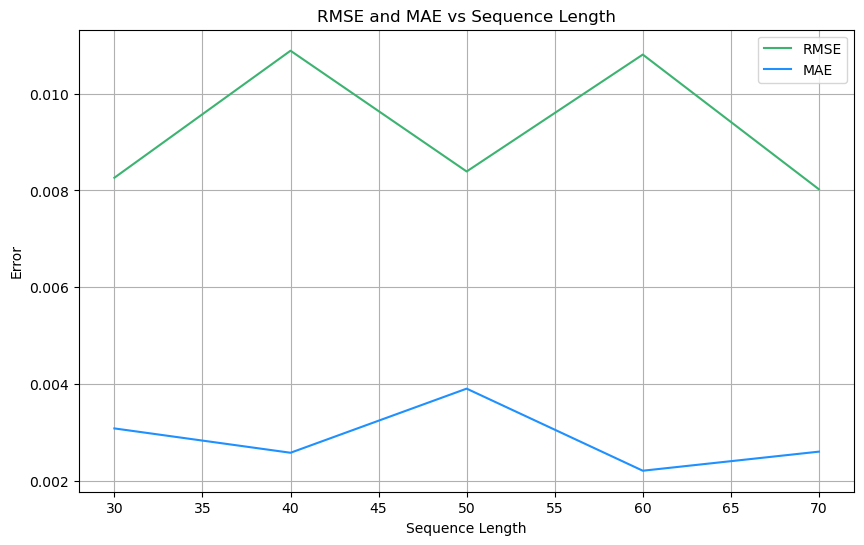

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['sequence_length'], results_df['RMSE'], label='RMSE', color='mediumseagreen')
plt.plot(results_df['sequence_length'], results_df['MAE'], label='MAE', color='dodgerblue')
plt.title('RMSE and MAE vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.show()

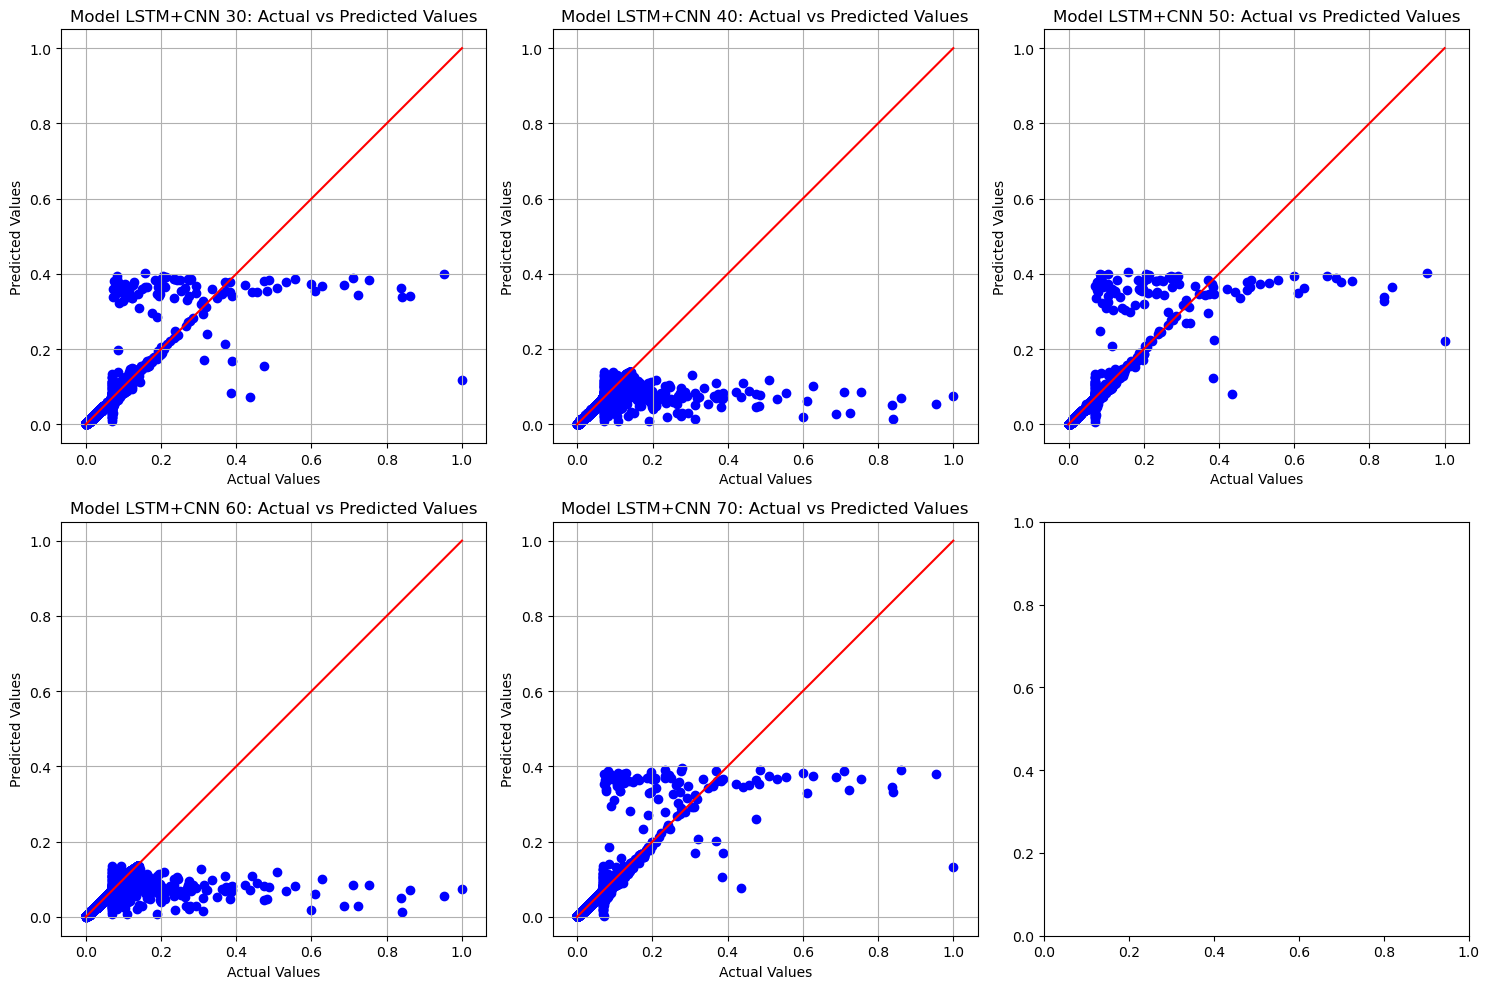

In [86]:
# a function to plot graphs of the model predictions vs actual values points all the models in one graph   

import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(predictions):
    num_plots = len(predictions)
    num_rows = 2
    num_cols = (num_plots + 2) // num_rows
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))  # num_rows rows, num_cols columns

    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, (y, y_pred) in enumerate(predictions):
        # Ensure y and y_pred are numpy arrays and flatten them
        y = np.array(y).flatten()
        y_pred = np.array(y_pred).flatten()

        axs[i].scatter(y, y_pred, color='blue')
        p1 = max(max(y_pred), max(y))
        p2 = min(min(y_pred), min(y))
        axs[i].plot([p1, p2], [p1, p2], 'red')
        axs[i].grid(True)
        axs[i].set_xlabel('Actual Values')
        axs[i].set_ylabel('Predicted Values')
        axs[i].set_title(f'Model LSTM+CNN {i+3}0: Actual vs Predicted Values')
        axs[i].axis('equal')

    plt.tight_layout()
    plt.show()

plot_predictions([(v30, y_pred30), (v40, y_pred40), (v50, y_pred50), (v60, y_pred60), (v70, y_pred70)])